# Environment set up

## Install packs

In [2]:
!pip install numpy matplotlib scipy numba scikit-learn mne PyWavelets pandas autoreject mne-features torcheeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 kB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## import packs

In [7]:
import mne
import numpy as np
import pandas as pd
from autoreject import AutoReject
import timeit
import torch
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Data set up

In [1]:
import gdown

## Dortmund

### Metadata

In [4]:
!gdown 1u56v_3lV0_jA2uA32E2qtAlpbZW7aMXj

Downloading...
From: https://drive.google.com/uc?id=1u56v_3lV0_jA2uA32E2qtAlpbZW7aMXj
To: /content/BrainAge_v1.0_ohneDKA.csv
100% 76.4k/76.4k [00:00<00:00, 89.1MB/s]


### Sample data

In [5]:
# Samples
'''
!gdown 1RCHit--cMXX-qde5i0kHmJuSnEaQMGGr
!gdown 1__hMM0t9JxYbyYZ_dhBhCqQgakzKdnpp
!gdown 13hZJQAfl6Q4EWf-ojsdmnwECSQK1J_DQ
!gdown 1EVZV8Byo3g1RQ4o91wc4qnK_scFmsufM

!mkdir samples
!mv *_RestState.set* samples'''

'\n!gdown 1RCHit--cMXX-qde5i0kHmJuSnEaQMGGr\n!gdown 1__hMM0t9JxYbyYZ_dhBhCqQgakzKdnpp\n!gdown 13hZJQAfl6Q4EWf-ojsdmnwECSQK1J_DQ\n!gdown 1EVZV8Byo3g1RQ4o91wc4qnK_scFmsufM\n\n!mkdir samples\n!mv *_RestState.set* samples'

In [6]:
!gdown --folder 15Gag-f49hFjQYmvcpYY4LdPjvLGhrVq_

Retrieving folder list
Processing file 1RCHit--cMXX-qde5i0kHmJuSnEaQMGGr VP001_RestState.set
Processing file 1__hMM0t9JxYbyYZ_dhBhCqQgakzKdnpp VP002_RestState.set
Processing file 13hZJQAfl6Q4EWf-ojsdmnwECSQK1J_DQ VP004_RestState.set
Processing file 1EVZV8Byo3g1RQ4o91wc4qnK_scFmsufM VP005_RestState.set
Processing file 1yMWoy5duJeCH3pnbMZn4obKmIXKRwLuQ VP006_RestState.set
Processing file 1_AkUESSyxo6eeWHPbt0JlFlsN0Gs1tfA VP007_RestState.set
Processing file 1f9Y8gB2T7VICIcnmdTbNqMgx201iHffS VP008_RestState.set
Processing file 1dvQ4mSjGsEOI72eJtSOS4p1VaHJJe9ac VP009_RestState.set
Processing file 1XwfQHoGp0A-6FMHu94l0WW-HslshKj6m VP010_RestState.set
Processing file 1A-k2ieFSwDJXi0vvaH7yXIxxJ_VqCn6i VP014_RestState.set
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1RCHit--cMXX-qde5i0kHmJuSnEaQMGGr
To: /content/dortmund_samples/VP001_RestState.set
100% 187M/187M [00:01<00:00, 94.4MB/s]
D

## IDBRAIN

### Metadata

# Read data

## Set up pathes

In [2]:
import os

In [3]:
EEG_FILES_DIR = '/content/dortmund_samples'
META_PATH = '/content/BrainAge_v1.0_ohneDKA.csv'

## Read files

In [4]:
eeg_files_names = os.listdir(EEG_FILES_DIR)
EEG_FILES = [EEG_FILES_DIR + '/' + eeg_file for eeg_file in eeg_files_names]
EEG_FILES = sorted(EEG_FILES)
EEG_FILES

['/content/dortmund_samples/VP001_RestState.set',
 '/content/dortmund_samples/VP002_RestState.set',
 '/content/dortmund_samples/VP004_RestState.set',
 '/content/dortmund_samples/VP005_RestState.set',
 '/content/dortmund_samples/VP006_RestState.set',
 '/content/dortmund_samples/VP007_RestState.set',
 '/content/dortmund_samples/VP008_RestState.set',
 '/content/dortmund_samples/VP009_RestState.set',
 '/content/dortmund_samples/VP010_RestState.set',
 '/content/dortmund_samples/VP014_RestState.set']

In [5]:
'''def read_eeg(eeg_files_dir, source='TDBRAIN'):
  if source == 'TDBRAIN':'''

"def read_eeg(eeg_files_dir, source='TDBRAIN'):\n  if source == 'TDBRAIN':"

In [8]:
mne_parsed_eeg = [mne.io.read_raw_eeglab(EEG_FILE, eog=('auto'), preload=False, uint16_codec=None,montage_units='mm',
                                         verbose=None) for EEG_FILE in EEG_FILES]

<ipython-input-8-0e90a4398cdd>:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  mne_parsed_eeg = [mne.io.read_raw_eeglab(EEG_FILE, eog=('auto'), preload=False, uint16_codec=None,montage_units='mm',
<ipython-input-8-0e90a4398cdd>:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  mne_parsed_eeg = [mne.io.read_raw_eeglab(EEG_FILE, eog=('auto'), preload=False, uint16_codec=None,montage_units='mm',
<ipython-input-8-0e90a4398cdd>:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  mne_parsed_eeg = [mne.io.read_raw_eeglab(EEG_FILE, eog=('auto'), preload=False, uint16_codec=None,montage_units='mm',
<ipython-input-8-0e90a4398cdd>:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautio

In [9]:
mne_parsed_eeg

[<RawEEGLAB | VP001_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP002_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP004_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP005_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP006_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP007_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP008_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP009_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP010_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP014_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>]

In [10]:
mne_parsed_eeg[2]

<RawEEGLAB | VP004_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>

# Transform data

In [11]:
mne_parsed_eeg

[<RawEEGLAB | VP001_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP002_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP004_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP005_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP006_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP007_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP008_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP009_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP010_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>,
 <RawEEGLAB | VP014_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>]

## Epochs splitting

In [12]:
epochs_split = []
for i in mne_parsed_eeg:
  epochs_split.append(mne.make_fixed_length_epochs(i, duration=4.0, overlap=0.5, preload=True))

Not setting metadata
205 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 205 events and 4000 original time points ...
0 bad epochs dropped
Not setting metadata
205 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 205 events and 4000 original time points ...
0 bad epochs dropped
Not setting metadata
205 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 205 events and 4000 original time points ...
0 bad epochs dropped
Not setting metadata
205 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 205 events and 4000 original time points ...
0 bad epochs dropped
Not setting metadata
205 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 205 events and 4000 original ti

In [13]:
epochs_split[2]

Number of events,205
Events,1: 205
Time range,0.000 – 3.999 s
Baseline,off


In [14]:
epochs_split[6]

Number of events,205
Events,1: 205
Time range,0.000 – 3.999 s
Baseline,off


## Data Cleaning

In [ ]:
epochs_split

[<Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>]

In [ ]:
clean_epochs_splits = []
for epochs in epochs_split:
  ar = AutoReject()
  clean_epochs_splits.append(ar.fit_transform(epochs))

# Extract features

## Parse metadata

In [15]:
epochs_split

[<Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>,
 <Epochs |  205 events (all good), 0 – 3.999 s, baseline off, ~400.5 MB, data loaded,
  '1': 205>]

In [16]:
epochs_split[0]

Number of events,205
Events,1: 205
Time range,0.000 – 3.999 s
Baseline,off


In [17]:
meta = pd.read_csv(META_PATH, sep=';')
meta

,VP_ID,sex,age_jittered,BMI,MBI_total,OLBI_total,PSQ_worries,PSQ_tension,PSQ_joy,PSQ_demands,...,LPAQ_sport,LPQA_total,WAI1_current,WAI2_demands,WAI3_diseases,WAI4_impairment,WAI5_sick_leave,WAI6_prognosis,WAI7_resources,WAI_total
0,VP001,m,21,25.51,,,0,20,86.67,40,...,17.5,22.2,,,7,,,,,
1,VP002,w,21,22.89,18,11,26.67,26.67,53.33,33.33,...,9.3,9.8,10,10,5,6,4,7,3,45
2,VP003,w,21,23.67,17,11,0,26.67,73.33,26.67,...,9,14,10,,5,6,4,7,4,36
3,VP004,m,21,43.38,24,13,80,53.33,53.33,33.33,...,0,7.7,9,10,5,6,5,7,3,45
4,VP005,w,21,19.76,31,13,13.33,46.67,66.67,46.67,...,0,2.4,9,10,5,6,4,7,3,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,VP614,m,68,24.47,,,13.33,58.33,46.67,26.67,...,6,7,,,1,,,,,
614,VP615,m,68,30.53,,,13.33,6.67,93.33,33.33,...,11,22.5,,,1,,,,,
615,VP616,m,69,33.48,,,20,6.67,86.67,20,...,0,7.5,,,1,,,,,
616,VP617,w,69,25.09,,,13.33,6.67,86.67,26.67,...,4.5,16,,,1,,,,,


In [18]:
def get_person_metadata(eeg_file_path, meta):
  filename = eeg_file_path.split('/')[-1]
  vp_id = filename.split('_')[0]
  sex = meta.loc[meta['VP_ID'] == vp_id, 'sex'].values[0]
  return {'eeg_file_path': eeg_file_path,
          'vp_id': vp_id,
          'sex': sex}

In [19]:
EEG_FILES

['/content/dortmund_samples/VP001_RestState.set',
 '/content/dortmund_samples/VP002_RestState.set',
 '/content/dortmund_samples/VP004_RestState.set',
 '/content/dortmund_samples/VP005_RestState.set',
 '/content/dortmund_samples/VP006_RestState.set',
 '/content/dortmund_samples/VP007_RestState.set',
 '/content/dortmund_samples/VP008_RestState.set',
 '/content/dortmund_samples/VP009_RestState.set',
 '/content/dortmund_samples/VP010_RestState.set',
 '/content/dortmund_samples/VP014_RestState.set']

In [20]:
meta_dicts = [get_person_metadata(EEG_FILES[i], meta) for i in range(len(EEG_FILES))]
meta_dicts

[{'eeg_file_path': '/content/dortmund_samples/VP001_RestState.set',
  'vp_id': 'VP001',
  'sex': 'm'},
 {'eeg_file_path': '/content/dortmund_samples/VP002_RestState.set',
  'vp_id': 'VP002',
  'sex': 'w'},
 {'eeg_file_path': '/content/dortmund_samples/VP004_RestState.set',
  'vp_id': 'VP004',
  'sex': 'm'},
 {'eeg_file_path': '/content/dortmund_samples/VP005_RestState.set',
  'vp_id': 'VP005',
  'sex': 'w'},
 {'eeg_file_path': '/content/dortmund_samples/VP006_RestState.set',
  'vp_id': 'VP006',
  'sex': 'w'},
 {'eeg_file_path': '/content/dortmund_samples/VP007_RestState.set',
  'vp_id': 'VP007',
  'sex': 'w'},
 {'eeg_file_path': '/content/dortmund_samples/VP008_RestState.set',
  'vp_id': 'VP008',
  'sex': 'w'},
 {'eeg_file_path': '/content/dortmund_samples/VP009_RestState.set',
  'vp_id': 'VP009',
  'sex': 'w'},
 {'eeg_file_path': '/content/dortmund_samples/VP010_RestState.set',
  'vp_id': 'VP010',
  'sex': 'w'},
 {'eeg_file_path': '/content/dortmund_samples/VP014_RestState.set',
  'vp

## Generate features

In [21]:
import mne_features

In [22]:
[0.5, 4., 8., 13., 30., 100.]

[0.5, 4.0, 8.0, 13.0, 30.0, 100.0]

In [23]:
freq_bands_names = ['0.5-4','4-8','8-13','13-30','30-100']

In [24]:
def make_design_df_PFB(epochs_split, meta_dict, feature_name = 'pfb'):
  #feature_matrix = mne_features.univariate.compute_pow_freq_bands(1000, epochs_split.get_data())
  feature_matrix = mne_features.feature_extraction.extract_features(epochs_split.get_data(), sfreq=1000,
                                                            selected_funcs=['pow_freq_bands'])

  epochs_df = epochs_split.to_data_frame()

  epochs_names = list(set(epochs_df['epoch']))
  channels_names = list(epochs_df.columns[3:])

  features_names = []
  for channel_name in channels_names:
    for freq_band in freq_bands_names:
      features_names.append(f'{channel_name}_{feature_name}_{freq_band}')
  #channels_names = [channel_name + f'_{feature_name}' for channel_name in channels_names]

  design_df = pd.DataFrame(feature_matrix, index=epochs_names, columns = features_names)
  design_df['vp_id'] = meta_dict['vp_id']
  design_df['epoch'] = design_df.index
  design_df['sex'] = meta_dict['sex']

  return design_df

In [25]:
design_dfs_pfb = [make_design_df_PFB(epochs_split[i], meta_dicts[i]) for i in range(len(epochs_split))]

In [26]:
design_dfs_pfb[0]

,Fp1_pfb_0.5-4,Fp1_pfb_4-8,Fp1_pfb_8-13,Fp1_pfb_13-30,Fp1_pfb_30-100,Fp2_pfb_0.5-4,Fp2_pfb_4-8,Fp2_pfb_8-13,Fp2_pfb_13-30,Fp2_pfb_30-100,...,PO4_pfb_13-30,PO4_pfb_30-100,PO8_pfb_0.5-4,PO8_pfb_4-8,PO8_pfb_8-13,PO8_pfb_13-30,PO8_pfb_30-100,vp_id,epoch,sex
0,0.313813,0.098400,0.050001,0.078177,0.335371,0.340393,0.090978,0.038826,0.089683,0.343059,...,0.168172,0.186473,0.108514,0.183353,0.293783,0.148968,0.169924,VP001,0,m
1,0.347667,0.046974,0.014891,0.059948,0.388765,0.379360,0.046629,0.025699,0.051690,0.367988,...,0.148121,0.219700,0.163701,0.156440,0.158922,0.160175,0.212529,VP001,1,m
2,0.547356,0.077299,0.027260,0.043768,0.201614,0.547578,0.070347,0.031872,0.043100,0.204025,...,0.198600,0.200444,0.135476,0.098051,0.185466,0.209066,0.221733,VP001,2,m
3,0.637007,0.110808,0.021576,0.023489,0.090576,0.630653,0.107849,0.019120,0.021697,0.102118,...,0.150404,0.123758,0.185823,0.149565,0.209818,0.183086,0.153109,VP001,3,m
4,0.711046,0.081722,0.009980,0.016522,0.106413,0.708727,0.083834,0.013887,0.018510,0.104110,...,0.118167,0.126270,0.182416,0.217139,0.223305,0.134393,0.144741,VP001,4,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.751668,0.158159,0.021170,0.008560,0.024128,0.720648,0.173883,0.025065,0.010269,0.030928,...,0.053301,0.154880,0.461338,0.145235,0.071540,0.062580,0.165060,VP001,200,m
201,0.798537,0.099375,0.005715,0.004060,0.022535,0.788048,0.100072,0.005055,0.005133,0.028322,...,0.023919,0.147578,0.567455,0.095361,0.041503,0.034497,0.152133,VP001,201,m
202,0.720328,0.061223,0.010608,0.016398,0.055416,0.722465,0.060059,0.011193,0.017265,0.056186,...,0.069730,0.245208,0.294577,0.098393,0.074247,0.081134,0.257919,VP001,202,m
203,0.788623,0.100939,0.007045,0.010906,0.043851,0.776031,0.102625,0.007710,0.011867,0.045469,...,0.082957,0.144727,0.373235,0.144283,0.132241,0.094707,0.148776,VP001,203,m


In [27]:
concat_design_df_pfb = pd.concat(design_dfs_pfb)
concat_design_df_pfb

,Fp1_pfb_0.5-4,Fp1_pfb_4-8,Fp1_pfb_8-13,Fp1_pfb_13-30,Fp1_pfb_30-100,Fp2_pfb_0.5-4,Fp2_pfb_4-8,Fp2_pfb_8-13,Fp2_pfb_13-30,Fp2_pfb_30-100,...,PO4_pfb_13-30,PO4_pfb_30-100,PO8_pfb_0.5-4,PO8_pfb_4-8,PO8_pfb_8-13,PO8_pfb_13-30,PO8_pfb_30-100,vp_id,epoch,sex
0,0.313813,0.098400,0.050001,0.078177,0.335371,0.340393,0.090978,0.038826,0.089683,0.343059,...,0.168172,0.186473,0.108514,0.183353,0.293783,0.148968,0.169924,VP001,0,m
1,0.347667,0.046974,0.014891,0.059948,0.388765,0.379360,0.046629,0.025699,0.051690,0.367988,...,0.148121,0.219700,0.163701,0.156440,0.158922,0.160175,0.212529,VP001,1,m
2,0.547356,0.077299,0.027260,0.043768,0.201614,0.547578,0.070347,0.031872,0.043100,0.204025,...,0.198600,0.200444,0.135476,0.098051,0.185466,0.209066,0.221733,VP001,2,m
3,0.637007,0.110808,0.021576,0.023489,0.090576,0.630653,0.107849,0.019120,0.021697,0.102118,...,0.150404,0.123758,0.185823,0.149565,0.209818,0.183086,0.153109,VP001,3,m
4,0.711046,0.081722,0.009980,0.016522,0.106413,0.708727,0.083834,0.013887,0.018510,0.104110,...,0.118167,0.126270,0.182416,0.217139,0.223305,0.134393,0.144741,VP001,4,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.515844,0.082791,0.015680,0.042330,0.099362,0.584416,0.086238,0.005976,0.019630,0.055781,...,0.094060,0.066875,0.430599,0.230086,0.111913,0.082498,0.056366,VP014,200,w
201,0.472037,0.048402,0.016424,0.060971,0.172161,0.619602,0.057892,0.010453,0.026671,0.097567,...,0.075797,0.081677,0.461017,0.208642,0.094947,0.100207,0.072519,VP014,201,w
202,0.091979,0.071410,0.027869,0.159328,0.425724,0.108127,0.062995,0.028046,0.186389,0.381782,...,0.130455,0.112430,0.353547,0.166864,0.111180,0.161780,0.112594,VP014,202,w
203,0.171787,0.092284,0.035963,0.153766,0.357859,0.184752,0.100550,0.036185,0.123440,0.343199,...,0.158869,0.123071,0.255211,0.227035,0.125884,0.232355,0.104535,VP014,203,w


In [77]:
concat_design_df_pfb.to_csv('concat_design_df_pfb.csv',index=False)

## Mean

In [28]:
def make_design_df_mean(epochs_split, meta_dict, feature_name = 'mean'):
  feature_matrix = mne_features.univariate.compute_mean(epochs_split)

  epochs_df = epochs_split.to_data_frame()

  epochs_names = list(set(epochs_df['epoch']))
  channels_names = list(epochs_df.columns[3:])
  channels_names = [f'{feature_name}_' + channel_name for channel_name in channels_names]

  design_df = pd.DataFrame(feature_matrix, index=epochs_names, columns = channels_names)
  design_df['vp_id'] = meta_dict['vp_id']
  design_df['epoch'] = design_df.index
  design_df['sex'] = meta_dict['sex']

  return design_df

In [29]:
design_dfs = [make_design_df_mean(epochs_split[i], meta_dicts[i]) for i in range(len(epochs_split))]

In [30]:
design_dfs[0]

,mean_Fp1,mean_Fp2,mean_F7,mean_F3,mean_Fz,mean_F4,mean_F8,mean_FC5,mean_FC1,mean_FC2,...,mean_P2,mean_P6,mean_PO7,mean_PO3,mean_POz,mean_PO4,mean_PO8,vp_id,epoch,sex
0,0.000545,0.000958,0.000030,0.000135,0.000165,0.000612,-0.000141,0.000062,-0.000125,-0.000127,...,-0.000618,-0.000453,-0.000416,0.000651,0.000475,-0.000533,0.000258,VP001,0,m
1,0.000540,0.000971,0.000021,0.000141,0.000172,0.000632,-0.000141,0.000063,-0.000129,-0.000125,...,-0.000624,-0.000458,-0.000426,0.000668,0.000487,-0.000529,0.000273,VP001,1,m
2,0.000508,0.000952,-0.000013,0.000115,0.000170,0.000637,-0.000160,0.000041,-0.000135,-0.000134,...,-0.000630,-0.000469,-0.000439,0.000681,0.000497,-0.000536,0.000281,VP001,2,m
3,0.000504,0.000952,-0.000039,0.000108,0.000170,0.000656,-0.000159,0.000051,-0.000136,-0.000139,...,-0.000647,-0.000488,-0.000453,0.000697,0.000506,-0.000546,0.000302,VP001,3,m
4,0.000540,0.000989,-0.000036,0.000121,0.000181,0.000680,-0.000158,0.000072,-0.000137,-0.000141,...,-0.000642,-0.000492,-0.000467,0.000706,0.000510,-0.000555,0.000312,VP001,4,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.000727,0.003904,0.004020,0.003306,-0.000941,0.003177,0.003802,0.002026,-0.000828,-0.000636,...,0.001988,0.001493,0.001265,-0.001343,-0.000026,0.000256,-0.000067,VP001,200,m
201,0.000718,0.003928,0.003981,0.003299,-0.000926,0.003226,0.003881,0.002019,-0.000823,-0.000631,...,0.001967,0.001486,0.001286,-0.001318,-0.000030,0.000243,-0.000054,VP001,201,m
202,0.000734,0.003953,0.003991,0.003309,-0.000930,0.003225,0.003873,0.002030,-0.000808,-0.000620,...,0.001968,0.001509,0.001302,-0.001309,-0.000028,0.000233,-0.000039,VP001,202,m
203,0.000730,0.003944,0.003988,0.003291,-0.000927,0.003212,0.003861,0.002016,-0.000828,-0.000633,...,0.001984,0.001494,0.001276,-0.001326,-0.000028,0.000249,-0.000064,VP001,203,m


In [32]:
'''DESIGN_DFS_DIR = '/content/design_dfs'
!mkdir $DESIGN_DFS_DIR

for i in range(len(design_dfs)):
  filename = DESIGN_DFS_DIR + '/' + meta_dicts[i]['vp_id'] + '.csv'
  design_dfs[i].to_csv(filename, index=False)'''

"DESIGN_DFS_DIR = '/content/design_dfs'\n!mkdir $DESIGN_DFS_DIR\n\nfor i in range(len(design_dfs)):\n  filename = DESIGN_DFS_DIR + '/' + meta_dicts[i]['vp_id'] + '.csv'\n  design_dfs[i].to_csv(filename, index=False)"

In [79]:
#!rm -r $DESIGN_DFS_DIR

In [92]:
#!tar -zcvf 'design_dfs.tar.gz' $DESIGN_DFS_DIR

In [35]:
concat_design_df_mean = pd.concat(design_dfs)
concat_design_df_mean

,mean_Fp1,mean_Fp2,mean_F7,mean_F3,mean_Fz,mean_F4,mean_F8,mean_FC5,mean_FC1,mean_FC2,...,mean_P2,mean_P6,mean_PO7,mean_PO3,mean_POz,mean_PO4,mean_PO8,vp_id,epoch,sex
0,0.000545,0.000958,0.000030,0.000135,0.000165,0.000612,-0.000141,0.000062,-0.000125,-0.000127,...,-0.000618,-0.000453,-0.000416,0.000651,0.000475,-0.000533,0.000258,VP001,0,m
1,0.000540,0.000971,0.000021,0.000141,0.000172,0.000632,-0.000141,0.000063,-0.000129,-0.000125,...,-0.000624,-0.000458,-0.000426,0.000668,0.000487,-0.000529,0.000273,VP001,1,m
2,0.000508,0.000952,-0.000013,0.000115,0.000170,0.000637,-0.000160,0.000041,-0.000135,-0.000134,...,-0.000630,-0.000469,-0.000439,0.000681,0.000497,-0.000536,0.000281,VP001,2,m
3,0.000504,0.000952,-0.000039,0.000108,0.000170,0.000656,-0.000159,0.000051,-0.000136,-0.000139,...,-0.000647,-0.000488,-0.000453,0.000697,0.000506,-0.000546,0.000302,VP001,3,m
4,0.000540,0.000989,-0.000036,0.000121,0.000181,0.000680,-0.000158,0.000072,-0.000137,-0.000141,...,-0.000642,-0.000492,-0.000467,0.000706,0.000510,-0.000555,0.000312,VP001,4,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.002139,-0.003626,0.000263,0.000293,-0.001302,-0.008214,0.001625,-0.000108,0.001700,-0.001092,...,0.001089,0.002581,0.001638,0.002106,0.000885,0.001358,0.001565,VP014,200,w
201,0.002148,-0.003597,0.000280,0.000299,-0.001309,-0.008239,0.001609,-0.000113,0.001699,-0.001089,...,0.001083,0.002576,0.001632,0.002102,0.000879,0.001353,0.001562,VP014,201,w
202,0.002137,-0.003607,0.000288,0.000300,-0.001313,-0.008267,0.001575,-0.000127,0.001697,-0.001091,...,0.001074,0.002568,0.001623,0.002091,0.000865,0.001341,0.001545,VP014,202,w
203,0.002128,-0.003620,0.000281,0.000289,-0.001313,-0.008282,0.001575,-0.000141,0.001695,-0.001092,...,0.001068,0.002562,0.001611,0.002082,0.000861,0.001334,0.001534,VP014,203,w


In [37]:
concat_design_df_mean.to_csv('concat_design_df_mean.csv',index=False)

# Save_results

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# RnD

In [19]:
set1 = mne.io.read_raw_eeglab(EEG_FILES[0], eog=('auto'), preload=False, uint16_codec=None, montage_units='mm', verbose=None)

<ipython-input-19-b4e5d01db141>:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  set1 = mne.io.read_raw_eeglab(EEG_FILES[0], eog=('auto'), preload=False, uint16_codec=None, montage_units='mm', verbose=None)
<ipython-input-19-b4e5d01db141>:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  set1 = mne.io.read_raw_eeglab(EEG_FILES[0], eog=('auto'), preload=False, uint16_codec=None, montage_units='mm', verbose=None)


In [20]:
set1

<RawEEGLAB | VP001_RestState.set, 64 x 720000 (720.0 s), ~351.7 MB, data loaded>

## Making Epochs

In [21]:
#creating events
events =  mne.make_fixed_length_events(set1, duration=4.0, overlap=0.5)
print(events[:5])  # show the first 5

[[    0     0     1]
 [ 3500     0     1]
 [ 7000     0     1]
 [10500     0     1]
 [14000     0     1]]


In [29]:
#creating epochs
epochs = mne.Epochs(
    set1,
    events,
    preload=True
)

Not setting metadata
205 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 205 events and 701 original time points ...
1 bad epochs dropped


## Cleaning Epochs

In [ ]:
#cleaning epochs
ar = AutoReject()
epochs_clean = ar.fit_transform(epochs)

Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/204 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/204 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/204 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/204 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.90 and n_interpolate=32


  0%|          | Repairing epochs : 0/204 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


In [ ]:
ec_df = epochs_clean.to_data_frame()
ec_df

,time,condition,epoch,Fp1,Fp2,F7,F3,Fz,F4,F8,...,TP8,P5,P1,P2,P6,PO7,PO3,POz,PO4,PO8
0,-0.200,1,1,6.335821,6.699005,11.656716,2.181592,-3.756219,-0.343284,8.393035,...,5.880597,10.965174,3.156716,0.308458,-2.288557,15.166667,9.029851,1.915423,-3.564677,-1.942786
1,-0.199,1,1,9.335821,6.699005,15.656716,3.681592,-1.756219,-1.343284,7.393035,...,5.880597,11.465174,2.656716,1.308458,-2.288557,13.166667,8.029851,1.915423,-4.064677,-5.442786
2,-0.198,1,1,11.835821,6.699005,17.156716,4.181592,-0.256219,-1.843284,6.393035,...,3.380597,10.965174,2.156716,0.808458,-3.788557,11.166667,7.529851,1.915423,-5.564677,-11.442786
3,-0.197,1,1,12.335821,6.699005,17.156716,6.681592,0.743781,-0.843284,6.393035,...,1.880597,8.965174,1.656716,-1.191542,-7.288557,11.166667,6.029851,0.415423,-8.064677,-15.942786
4,-0.196,1,1,9.835821,3.699005,12.156716,5.681592,0.743781,-0.843284,5.893035,...,1.380597,6.465174,0.156716,-2.191542,-11.288557,8.666667,5.029851,-0.584577,-10.564677,-18.942786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142999,0.496,1,204,-19.855721,-26.569652,-13.626866,-17.495025,-9.905480,-14.921915,-8.723881,...,4.554726,8.079473,4.114428,8.427867,11.912935,21.828358,13.859812,12.348259,16.900498,23.746269
143000,0.497,1,204,-17.355721,-34.569652,-17.126866,-21.495025,-12.003459,-16.032924,-10.223881,...,3.554726,7.599911,4.114428,8.223071,12.412935,21.828358,14.385925,13.348259,17.400498,24.246269
143001,0.498,1,204,-17.355721,-37.569652,-21.126866,-24.995025,-17.155049,-19.741280,-14.723881,...,2.554726,7.315547,3.614428,6.988705,11.912935,22.328358,13.966260,12.848259,16.900498,24.746269
143002,0.499,1,204,-21.355721,-35.069652,-24.126866,-24.995025,-22.701975,-26.280928,-21.723881,...,5.554726,9.226999,4.114428,6.773266,11.912935,25.828358,15.947523,13.848259,17.900498,25.746269


In [ ]:
ec_df[ec_df['epoch'] == 1]

,time,condition,epoch,Fp1,Fp2,F7,F3,Fz,F4,F8,...,TP8,P5,P1,P2,P6,PO7,PO3,POz,PO4,PO8
0,-0.200,1,1,6.335821,6.699005,11.656716,2.181592,-3.756219,-0.343284,8.393035,...,5.880597,10.965174,3.156716,0.308458,-2.288557,15.166667,9.029851,1.915423,-3.564677,-1.942786
1,-0.199,1,1,9.335821,6.699005,15.656716,3.681592,-1.756219,-1.343284,7.393035,...,5.880597,11.465174,2.656716,1.308458,-2.288557,13.166667,8.029851,1.915423,-4.064677,-5.442786
2,-0.198,1,1,11.835821,6.699005,17.156716,4.181592,-0.256219,-1.843284,6.393035,...,3.380597,10.965174,2.156716,0.808458,-3.788557,11.166667,7.529851,1.915423,-5.564677,-11.442786
3,-0.197,1,1,12.335821,6.699005,17.156716,6.681592,0.743781,-0.843284,6.393035,...,1.880597,8.965174,1.656716,-1.191542,-7.288557,11.166667,6.029851,0.415423,-8.064677,-15.942786
4,-0.196,1,1,9.835821,3.699005,12.156716,5.681592,0.743781,-0.843284,5.893035,...,1.380597,6.465174,0.156716,-2.191542,-11.288557,8.666667,5.029851,-0.584577,-10.564677,-18.942786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,0.496,1,1,-13.164179,-10.300995,-0.343284,-7.318408,-6.756219,-4.843284,-1.606965,...,5.880597,2.465174,5.156716,10.308458,11.211443,-3.833333,-0.470149,4.415423,7.935323,15.557214
697,0.497,1,1,-11.664179,-11.300995,1.156716,-7.318408,-6.756219,-3.343284,-1.106965,...,5.880597,0.465174,5.156716,9.308458,10.211443,-3.833333,-0.970149,4.915423,7.435323,18.057214
698,0.498,1,1,-8.664179,-12.300995,6.656716,-5.818408,-7.256219,-2.843284,-3.106965,...,2.380597,-2.034826,2.156716,5.808458,8.211443,-5.833333,-3.470149,2.415423,2.935323,15.557214
699,0.499,1,1,-7.664179,-13.300995,6.156716,-5.818408,-7.256219,-2.343284,-2.606965,...,0.880597,-3.534826,-0.843284,2.308458,4.711443,-8.333333,-6.470149,-1.584577,-1.564677,11.057214


In [ ]:
import seaborn as sns

<Axes: xlabel='time', ylabel='Count'>

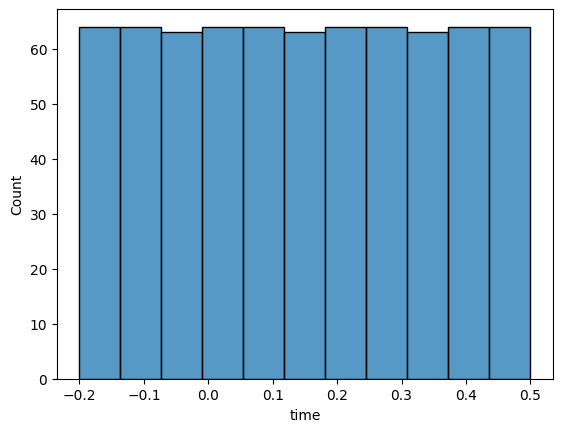

In [ ]:
sns.histplot(ec_df[ec_df['epoch'] == 1]['time'])

## Parse Metadata

In [24]:
meta_dort = pd.read_csv(META_PATH, sep=';')
meta_dort

,VP_ID,sex,age_jittered,BMI,MBI_total,OLBI_total,PSQ_worries,PSQ_tension,PSQ_joy,PSQ_demands,...,LPAQ_sport,LPQA_total,WAI1_current,WAI2_demands,WAI3_diseases,WAI4_impairment,WAI5_sick_leave,WAI6_prognosis,WAI7_resources,WAI_total
0,VP001,m,21,25.51,,,0,20,86.67,40,...,17.5,22.2,,,7,,,,,
1,VP002,w,21,22.89,18,11,26.67,26.67,53.33,33.33,...,9.3,9.8,10,10,5,6,4,7,3,45
2,VP003,w,21,23.67,17,11,0,26.67,73.33,26.67,...,9,14,10,,5,6,4,7,4,36
3,VP004,m,21,43.38,24,13,80,53.33,53.33,33.33,...,0,7.7,9,10,5,6,5,7,3,45
4,VP005,w,21,19.76,31,13,13.33,46.67,66.67,46.67,...,0,2.4,9,10,5,6,4,7,3,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,VP614,m,68,24.47,,,13.33,58.33,46.67,26.67,...,6,7,,,1,,,,,
614,VP615,m,68,30.53,,,13.33,6.67,93.33,33.33,...,11,22.5,,,1,,,,,
615,VP616,m,69,33.48,,,20,6.67,86.67,20,...,0,7.5,,,1,,,,,
616,VP617,w,69,25.09,,,13.33,6.67,86.67,26.67,...,4.5,16,,,1,,,,,


## Features

In [25]:
import mne_features

In [30]:
epochs.get_data().shape

(204, 64, 701)

In [ ]:
clean_means = mne_features.univariate.compute_mean(epochs_clean)
clean_means

array([[-1.95947154e-06, -2.21112341e-06,  9.66987459e-07, ...,
        -6.20953719e-07, -2.53186635e-06, -2.34649506e-06],
       [ 2.72359671e-06,  1.06468868e-05, -3.25837290e-06, ...,
        -5.26039703e-06, -5.28772684e-06, -6.84630343e-06],
       [ 2.26142114e-06,  5.99014201e-06, -3.54367960e-06, ...,
        -1.94161503e-06, -2.21069758e-06, -7.67425355e-07],
       ...,
       [-4.12461941e-06, -6.42916086e-06,  8.66459429e-08, ...,
        -4.82775140e-06, -6.97748774e-06, -7.30325903e-06],
       [ 2.37609030e-06,  1.58425997e-06,  4.80471395e-06, ...,
         3.22030717e-06,  2.36485993e-06,  2.57362971e-06],
       [-9.91242078e-07, -7.23717362e-07,  5.42178551e-07, ...,
        -1.12107082e-06,  3.67687241e-07,  2.32116167e-06]])

In [ ]:
clean_means.shape

(204, 64)

In [ ]:
clean_means[0]

array([-1.95947154e-06, -2.21112341e-06,  9.66987459e-07, -2.02953492e-06,
       -2.11356555e-06,  6.11386718e-08, -8.05743039e-08,  4.95709754e-07,
        4.22686851e-07,  4.53839930e-07,  6.74966821e-07,  5.71166990e-07,
        1.58806538e-06,  1.49321509e-06,  1.79560826e-06,  1.22249310e-06,
       -1.23478897e-06, -3.21882031e-07,  8.79060475e-07,  7.28149552e-07,
        8.80554432e-07, -4.00564936e-08, -8.22715949e-07,  1.27124364e-06,
        9.48900292e-07, -7.16918262e-07, -1.09810789e-06,  2.02897779e-06,
       -3.63956552e-07, -1.87978439e-06, -2.45093363e-06, -3.00487576e-07,
       -3.01235264e-06, -9.07938907e-07, -3.06498889e-07, -1.10560961e-06,
       -2.40907091e-06, -1.65534666e-06,  9.88435142e-07,  2.17628993e-07,
        2.73635744e-06,  1.46561415e-06, -2.38323362e-07,  1.51737745e-06,
        9.78932016e-07,  9.98623147e-07,  1.30685020e-06,  2.51435405e-07,
        5.48257287e-09,  1.46228203e-06, -2.92013541e-08,  5.68768142e-07,
       -9.57168508e-07,  

In [ ]:
pow_freq_bands

In [69]:
feautures = mne_features.feature_extraction.extract_features(epochs.get_data(), sfreq=1000,
                                                            selected_funcs=['pow_freq_bands'])

In [50]:
feautures.shape

(204, 320)

In [49]:
feautures

array([[0.29737321, 0.04093124, 0.00608595, ..., 0.12063436, 0.11113314,
        0.3645966 ],
       [0.21432645, 0.06325666, 0.0105704 , ..., 0.15677545, 0.15894897,
        0.25181782],
       [0.65427817, 0.08250979, 0.01354463, ..., 0.25909892, 0.13816494,
        0.13833738],
       ...,
       [0.86221716, 0.11152239, 0.00857074, ..., 0.00792073, 0.00703885,
        0.04548991],
       [0.07324337, 0.11511253, 0.02489003, ..., 0.17494592, 0.1311977 ,
        0.24873041],
       [0.73614562, 0.10433967, 0.01031328, ..., 0.04299533, 0.05290387,
        0.1198683 ]])

In [38]:
feautures = mne_features.feature_extraction.extract_features(epochs.get_data(), sfreq=1000,
                                                            selected_funcs=['mean','variance','std'])

In [39]:
feautures

array([[ 1.25217387e-05,  1.29652380e-05,  1.37377840e-05, ...,
         5.59852933e-06,  5.72573899e-06,  7.16109758e-06],
       [-1.20628349e-05, -1.23891456e-05, -6.84700960e-06, ...,
         7.42908920e-06,  7.71850292e-06,  9.07716142e-06],
       [ 9.17427130e-06,  1.04940490e-05,  1.62010915e-06, ...,
         8.20541854e-06,  7.71585611e-06,  9.26517224e-06],
       ...,
       [ 8.59868702e-05,  7.89047594e-05,  3.36703785e-05, ...,
         2.93879436e-05,  3.06865019e-05,  3.19872616e-05],
       [ 3.69308628e-05,  3.48307606e-05,  1.69636057e-05, ...,
         1.70965633e-05,  1.60027563e-05,  2.17008097e-05],
       [ 5.69679562e-05,  5.80455178e-05,  6.47415561e-06, ...,
         2.50006665e-05,  2.59728046e-05,  3.00542696e-05]])

In [40]:
feautures.shape

(204, 192)

In [31]:
ec_df

NameError: ignored

In [ ]:
channels_names = list(ec_df.columns[3:])
channels_names = ['mean_' + channel_name for channel_name in channels_names]
channels_names[:5]

['mean_Fp1', 'mean_Fp2', 'mean_F7', 'mean_F3', 'mean_Fz']

In [ ]:
epochs_names = list(set(ec_df['epoch']))
epochs_names[:5]

NameError: ignored

In [ ]:
'''for epoch_id in range(clean_means.shape[0]):
  for channel_id in range(clean_means.shape[1]):
    print(channels_names[channel_id])
    print(epochs_names[epoch_id])
    print(clean_means[epoch_id][channel_id])
    print()'''

'for epoch_id in range(clean_means.shape[0]):\n  for channel_id in range(clean_means.shape[1]):\n    print(channels_names[channel_id])\n    print(epochs_names[epoch_id])\n    print(clean_means[epoch_id][channel_id])\n    print()'

In [ ]:
for i in range(5):
  print(i)

0
1
2
3
4


In [ ]:
len(clean_means[0])

64

In [ ]:
df = pd.DataFrame(clean_means, index=epochs_names, columns = channels_names)
df

,mean_Fp1,mean_Fp2,mean_F7,mean_F3,mean_Fz,mean_F4,mean_F8,mean_FC5,mean_FC1,mean_FC2,...,mean_TP8,mean_P5,mean_P1,mean_P2,mean_P6,mean_PO7,mean_PO3,mean_POz,mean_PO4,mean_PO8
1,-1.959472e-06,-2.211123e-06,9.669875e-07,-2.029535e-06,-2.113566e-06,6.113867e-08,-8.057430e-08,4.957098e-07,4.226869e-07,4.538399e-07,...,-7.913003e-07,1.016529e-06,0.000001,6.095415e-08,-1.755034e-06,-8.882549e-07,3.023186e-07,-6.209537e-07,-2.531866e-06,-2.346495e-06
2,2.723597e-06,1.064689e-05,-3.258373e-06,1.082994e-07,9.271659e-07,1.066181e-06,3.961345e-06,-5.208700e-06,6.462765e-07,8.429394e-07,...,-1.093697e-06,-6.748712e-06,-0.000004,-3.402454e-06,-5.556898e-06,-7.765076e-06,-5.932451e-06,-5.260397e-06,-5.287727e-06,-6.846303e-06
3,2.261421e-06,5.990142e-06,-3.543680e-06,-3.177128e-06,2.093565e-06,8.511902e-06,1.200474e-05,-4.766868e-06,-1.823581e-06,-1.053896e-07,...,1.381619e-06,-3.086135e-06,-0.000004,-2.809630e-06,-8.345186e-07,-2.107739e-06,-2.839934e-06,-1.941615e-06,-2.210698e-06,-7.674254e-07
4,2.914571e-06,4.691556e-06,-1.531412e-06,-2.506831e-07,-1.554922e-07,8.446853e-07,3.458457e-08,-1.355008e-06,4.108700e-07,-1.809774e-06,...,-3.031696e-06,-3.650737e-06,-0.000002,-3.970868e-07,-1.160911e-06,-3.889674e-06,-3.792092e-06,-1.508669e-06,-6.166564e-07,-6.570926e-08
5,4.657022e-06,3.830658e-06,4.227401e-07,2.804263e-06,9.747973e-07,-1.542785e-07,-2.540291e-06,2.010064e-07,-1.040312e-06,-3.657887e-08,...,-2.374493e-06,-1.654206e-06,-0.000002,-4.303121e-06,-4.413503e-06,-1.239888e-06,-3.118239e-06,-4.807262e-06,-4.083679e-06,-5.073105e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,7.900747e-08,-3.311511e-09,-2.762823e-07,-1.124162e-06,1.988371e-06,9.718856e-07,-4.143132e-06,-1.377488e-06,-8.457108e-07,-9.759689e-07,...,-1.166414e-05,-8.384550e-06,-0.000008,-8.317791e-06,-1.266696e-05,-9.354071e-06,-8.926576e-06,-8.871200e-06,-1.134566e-05,-1.296183e-05
201,8.048878e-07,-3.679121e-07,3.038804e-06,6.786361e-07,-2.686816e-07,-1.275028e-06,-1.182007e-06,3.624236e-06,1.866498e-06,3.620343e-07,...,2.936814e-06,6.701957e-06,0.000005,1.581039e-06,2.913095e-06,6.234345e-06,4.104119e-06,-5.156067e-07,1.625840e-06,1.991970e-06
202,-4.124619e-06,-6.429161e-06,8.664594e-08,-3.599286e-06,-2.152100e-06,-2.614780e-06,-5.447506e-06,-3.550919e-06,-3.545997e-06,-1.280725e-06,...,-6.009993e-06,-8.549017e-06,-0.000007,-5.932784e-06,-9.119747e-06,-6.303614e-06,-7.153576e-06,-4.827751e-06,-6.977488e-06,-7.303259e-06
203,2.376090e-06,1.584260e-06,4.804714e-06,3.544258e-06,8.449088e-07,4.339678e-07,1.911346e-06,2.473698e-06,1.029137e-06,-2.272730e-07,...,5.156443e-06,7.891955e-06,0.000006,1.789509e-06,4.342045e-06,7.369731e-06,6.674340e-06,3.220307e-06,2.364860e-06,2.573630e-06


In [ ]:
df['sex'] = 'non-binary'
df['epoch'] = df.index

df['id'] = 'person 1'

df

,mean_Fp1,mean_Fp2,mean_F7,mean_F3,mean_Fz,mean_F4,mean_F8,mean_FC5,mean_FC1,mean_FC2,...,mean_P2,mean_P6,mean_PO7,mean_PO3,mean_POz,mean_PO4,mean_PO8,sex,epoch,id
1,-1.959472e-06,-2.211123e-06,9.669875e-07,-2.029535e-06,-2.113566e-06,6.113867e-08,-8.057430e-08,4.957098e-07,4.226869e-07,4.538399e-07,...,6.095415e-08,-1.755034e-06,-8.882549e-07,3.023186e-07,-6.209537e-07,-2.531866e-06,-2.346495e-06,non-binary,1,person 1
2,2.723597e-06,1.064689e-05,-3.258373e-06,1.082994e-07,9.271659e-07,1.066181e-06,3.961345e-06,-5.208700e-06,6.462765e-07,8.429394e-07,...,-3.402454e-06,-5.556898e-06,-7.765076e-06,-5.932451e-06,-5.260397e-06,-5.287727e-06,-6.846303e-06,non-binary,2,person 1
3,2.261421e-06,5.990142e-06,-3.543680e-06,-3.177128e-06,2.093565e-06,8.511902e-06,1.200474e-05,-4.766868e-06,-1.823581e-06,-1.053896e-07,...,-2.809630e-06,-8.345186e-07,-2.107739e-06,-2.839934e-06,-1.941615e-06,-2.210698e-06,-7.674254e-07,non-binary,3,person 1
4,2.914571e-06,4.691556e-06,-1.531412e-06,-2.506831e-07,-1.554922e-07,8.446853e-07,3.458457e-08,-1.355008e-06,4.108700e-07,-1.809774e-06,...,-3.970868e-07,-1.160911e-06,-3.889674e-06,-3.792092e-06,-1.508669e-06,-6.166564e-07,-6.570926e-08,non-binary,4,person 1
5,4.657022e-06,3.830658e-06,4.227401e-07,2.804263e-06,9.747973e-07,-1.542785e-07,-2.540291e-06,2.010064e-07,-1.040312e-06,-3.657887e-08,...,-4.303121e-06,-4.413503e-06,-1.239888e-06,-3.118239e-06,-4.807262e-06,-4.083679e-06,-5.073105e-06,non-binary,5,person 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,7.900747e-08,-3.311511e-09,-2.762823e-07,-1.124162e-06,1.988371e-06,9.718856e-07,-4.143132e-06,-1.377488e-06,-8.457108e-07,-9.759689e-07,...,-8.317791e-06,-1.266696e-05,-9.354071e-06,-8.926576e-06,-8.871200e-06,-1.134566e-05,-1.296183e-05,non-binary,200,person 1
201,8.048878e-07,-3.679121e-07,3.038804e-06,6.786361e-07,-2.686816e-07,-1.275028e-06,-1.182007e-06,3.624236e-06,1.866498e-06,3.620343e-07,...,1.581039e-06,2.913095e-06,6.234345e-06,4.104119e-06,-5.156067e-07,1.625840e-06,1.991970e-06,non-binary,201,person 1
202,-4.124619e-06,-6.429161e-06,8.664594e-08,-3.599286e-06,-2.152100e-06,-2.614780e-06,-5.447506e-06,-3.550919e-06,-3.545997e-06,-1.280725e-06,...,-5.932784e-06,-9.119747e-06,-6.303614e-06,-7.153576e-06,-4.827751e-06,-6.977488e-06,-7.303259e-06,non-binary,202,person 1
203,2.376090e-06,1.584260e-06,4.804714e-06,3.544258e-06,8.449088e-07,4.339678e-07,1.911346e-06,2.473698e-06,1.029137e-06,-2.272730e-07,...,1.789509e-06,4.342045e-06,7.369731e-06,6.674340e-06,3.220307e-06,2.364860e-06,2.573630e-06,non-binary,203,person 1


## POW